<a href="https://colab.research.google.com/github/Noufal21/text-mining/blob/master/project/cleaningData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "/content/train.csv.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.attrs import ORTH, LEMMA, NORM, TAG
from spacy.language import Language
from spacy.tokens import Doc
from spacy.symbols import IS_CURRENCY
from nltk.stem import SnowballStemmer

In [ ]:
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])

# reference https://github.com/slaps-lab/bibliotheca/blob/master/text/expand_contractions_with_spacy.ipynb
def expand_contractions(text: str) -> str:
    
    ## https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions
    
    flags = re.IGNORECASE | re.MULTILINE
    
    text = re.sub(r'`', "'", text, flags = flags)
    
    ## starts / ends with '
    text = re.sub(
        r"(\s|^)'(aight|cause)(\s|$)",
        '\g<1>\g<2>\g<3>',
        text, flags = flags
    )
    
    text = re.sub(
        r"(\s|^)'t(was|is)(\s|$)", r'\g<1>it \g<2>\g<3>',
        text,
        flags = flags
    )
    
    text = re.sub(
        r"(\s|^)ol'(\s|$)",
        '\g<1>old\g<2>',
        text, flags = flags
    )
    
    ## expand words without '
    text = re.sub(r"\b(aight)\b", 'alright', text, flags = flags)
    text = re.sub(r'\bcause\b', 'because', text, flags = flags)
    text = re.sub(r'\b(finna|gonna)\b', 'going to', text, flags = flags)
    text = re.sub(r'\bgimme\b', 'give me', text, flags = flags)
    text = re.sub(r"\bgive'n\b", 'given', text, flags = flags)
    text = re.sub(r"\bhowdy\b", 'how do you do', text, flags = flags)
    text = re.sub(r"\bgotta\b", 'got to', text, flags = flags)
    text = re.sub(r"\binnit\b", 'is it not', text, flags = flags)
    text = re.sub(r"\b(can)(not)\b", r'\g<1> \g<2>', text, flags = flags)
    text = re.sub(r"\bwanna\b", 'want to', text, flags = flags)
    text = re.sub(r"\bmethinks\b", 'me thinks', text, flags = flags)
    
    ## one offs,
    text = re.sub(r"\bo'er\b", r'over', text, flags = flags)
    text = re.sub(r"\bne'er\b", r'never', text, flags = flags)
    text = re.sub(r"\bo'?clock\b", 'of the clock', text, flags = flags)
    text = re.sub(r"\bma'am\b", 'madam', text, flags = flags)
    text = re.sub(r"\bgiv'n\b", 'given', text, flags = flags)
    text = re.sub(r"\be'er\b", 'ever', text, flags = flags)
    text = re.sub(r"\bd'ye\b", 'do you', text, flags = flags)
    text = re.sub(r"\be'er\b", 'ever', text, flags = flags)
    text = re.sub(r"\bd'ye\b", 'do you', text, flags = flags)
    text = re.sub(r"\bg'?day\b", 'good day', text, flags = flags)
    text = re.sub(r"\b(ain|amn)'?t\b", 'am not', text, flags = flags)
    text = re.sub(r"\b(are|can)'?t\b", r'\g<1> not', text, flags = flags)
    text = re.sub(r"\b(let)'?s\b", r'\g<1> us', text, flags = flags)
    
    ## major expansions involving smaller,
    text = re.sub(r"\by'all'dn't've'd\b", 'you all would not have had', text, flags = flags)
    text = re.sub(r"\by'all're\b", 'you all are', text, flags = flags)
    text = re.sub(r"\by'all'd've\b", 'you all would have', text, flags = flags)
    text = re.sub(r"(\s)y'all(\s)", r'\g<1>you all\g<2>', text, flags = flags)
    
    ## minor,
    text = re.sub(r"\b(won)'?t\b", 'will not', text, flags = flags)
    text = re.sub(r"\bhe'd\b", 'he had', text, flags = flags)

    ## major,
    text = re.sub(r"\b(I|we|who)'?d'?ve\b", r'\g<1> would have', text, flags = flags)
    text = re.sub(r"\b(could|would|must|should|would)n'?t'?ve\b", r'\g<1> not have', text, flags = flags)
    text = re.sub(r"\b(he)'?dn'?t'?ve'?d\b", r'\g<1> would not have had', text, flags = flags)
    text = re.sub(r"\b(daren|daresn|dasn)'?t", 'dare not', text, flags = flags)
    text = re.sub(r"\b(he|how|i|it|she|that|there|these|they|we|what|where|which|who|you)'?ll\b", r'\g<1> will', text, flags = flags)
    text = re.sub(r"\b(he|how|i|it|she|that|there|these|they|we|what|where|which|who|you)’?ll\b", r'\g<1> will', text, flags = flags)
    text = re.sub(r"\b(everybody|everyone|he|how|it|she|somebody|someone|something|that|there|this|what|when|where|which|who|why)'?s\b", r'\g<1> is', text, flags = flags)
    text = re.sub(r"\b(I)'?m'a\b", r'\g<1> am about to', text, flags = flags)
    text = re.sub(r"\b(I)'?m'o\b", r'\g<1> am going to', text, flags = flags)
    text = re.sub(r"\b(I)'?m\b", r'\g<1> am', text, flags = flags)
    text = re.sub(r"\bshan't\b", 'shall not', text, flags = flags)
    text = re.sub(r"\b(are|could|did|does|do|go|had|has|have|is|may|might|must|need|ought|shall|should|was|were|would)n'?t\b", r'\g<1> not', text, flags = flags)
    text = re.sub(r"\b(are|could|did|does|do|go|had|has|have|is|may|might|must|need|ought|shall|should|was|were|would)n’?t\b", r'\g<1> not', text, flags = flags)
    text = re.sub(r"\b(could|had|he|i|may|might|must|should|these|they|those|to|we|what|where|which|who|would|you)'?ve\b", r'\g<1> have', text, flags = flags)
    text = re.sub(r"\b(how|so|that|there|these|they|those|we|what|where|which|who|why|you)'?re\b", r'\g<1> are', text, flags = flags)
    text = re.sub(r"\b(I|it|she|that|there|they|we|which|you)'?d\b", r'\g<1> had', text, flags = flags)
    text = re.sub(r"\b(how|what|where|who|why)'?d\b", r'\g<1> did', text, flags = flags)
    text = re.sub(r"\b(could|would|must|should|would)not\b", r'\g<1> not', text, flags = flags)
    text = re.sub(r"\b(are|could|did|does|do|go|had|has|have|is|may|might|must|need|ought|shall|should|was|were|would)not\b", r'\g<1> not', text, flags = flags)
    
    ## countries
    text = re.sub(r"\bu.k\b", 'United Kingdom', text, flags = flags)
    text = re.sub(r"\busa\b", 'United State', text, flags = flags)
    ## currency
    text = re.sub(r"\$", 'USD', text, flags = flags)
    text = re.sub(r"\£", 'Pound', text, flags = flags)
    text = re.sub(r"\₹", 'INR', text, flags = flags)
    text = re.sub(r"\bbn\b", 'billion', text, flags = flags)

    # weights
    text = re.sub(r"\bkg\b", 'kilograms', text, flags = flags)
    
    text = re.sub(r"\%", 'percentage', text, flags = flags)
    text = re.sub(r"\@", 'at sign', text, flags = flags)

    #others
    
    text = re.sub(r"\bpokémonpokémon\b", 'pokemon', text, flags = flags)
    text = re.sub(r"\bpokémons\b", 'pokemon', text, flags = flags)
    text = re.sub(r"\bpokécoins\b", 'pokecoins', text, flags = flags)
    text = re.sub(r"\bpokémon\b", 'pokemon', text, flags = flags)
    text = re.sub(r"\bpoké\b", 'pokemon', text, flags = flags)
    text = re.sub(r"\b'?s\b", 'is', text, flags = flags)
    text = re.sub(r"\bbeyoncé\b", 'beyonce', text, flags = flags)
    text = re.sub(r"\bCompany‬‪Delhi‬\b", 'company‬‪ delhi‬', text, flags = flags)
    text = re.sub(r"\bméxico‬\b", 'mexico', text, flags = flags)
    text = re.sub(r"\bcan´?t\b", 'can not', text, flags = flags)
    text = re.sub(r"\bcountry－japan\b", 'company‬‪ japan', text, flags = flags)
    text = re.sub(r"\bnestlé\b", 'nestle', text, flags = flags)
    text = re.sub(r"\bmontréal\b", 'montreal', text, flags = flags)
    text = re.sub(r"\bfiancé\b", 'fiance', text, flags = flags)
    text = re.sub(r"\bréally\b", 'really', text, flags = flags)
    text = re.sub(r"\bzürich\b", 'zurich', text, flags = flags)
    text = re.sub(r"\brésumé\b", 'resume', text, flags = flags)
    text = re.sub(r"\bresumé\b", 'resume', text, flags = flags)
    text = re.sub(r"\bdöner\b", 'doner', text, flags = flags)
    text = re.sub(r"\bwhàt\b", 'what', text, flags = flags)
    text = re.sub(r"\bdéjà\b", 'deja', text, flags = flags)
    text = re.sub(r"\bsánchez\b", 'sanchez', text, flags = flags)
    text = re.sub(r"\bcliché\b", 'cliche', text, flags = flags)
    text = re.sub(r"\bcliché\b", 'cliche', text, flags = flags)
    text = re.sub(r"\bsãotomépríncipe\b", 'Sao Tome Principe', text, flags = flags)

    text = re.sub(r"\bn’tn’t\b", 'not not', text, flags = flags)
    text = re.sub(r"\bn'tn't\b", 'not not', text, flags = flags)

    text = re.sub(r"\bcan’t\b", 'can not', text, flags = flags)
    text = re.sub(r"\bcan't\b", 'can not', text, flags = flags)


    text = re.sub(r"\bresolutions’2017\b", 'resolutions 2017', text, flags = flags)
    text = re.sub(r"\b‎INR1000‎INR500\b", '‎inr1000‎ inr500', text, flags = flags)
    text = re.sub(r"\b(what|it|year|trump|master|clinton|modi|who|people|world|hoffman|girl|earth|someone|mcdonald|india|person|mother|he|asperger|one|government|layman|planet|today|everyone|hitler|else|women|president|driver|husband|there|sister|newton|writer|apple|other)’is\b", r'\g<1> is', text, flags = flags)
    text = re.sub(r"\b(what|it|year|trump|master|clinton|modi|who|people|world|hoffman|girl|earth|someone|mcdonald|india|person|mother|he|asperger|one|government|layman|planet|today|everyone|hitler|else|women|president|driver|husband|there|sister|newton|writer|apple|other)'is\b", r'\g<1> is', text, flags = flags)
    
    text = re.sub(r"\b’re\b", 'are', text, flags = flags)
    text = re.sub(r"\b're\b", 'are', text, flags = flags)

    text = re.sub(r"\b’ve\b", 'have', text, flags = flags)
    text = re.sub(r"\b've\b", 'have', text, flags = flags)



    text = re.sub(r"\b’m\b", 'am', text, flags = flags)
    text = re.sub(r"\b'm\b", 'am', text, flags = flags)
    text = re.sub(r"\bn’?t\b", 'not', text, flags = flags)
    text = re.sub(r"\bn'?t\b", 'not', text, flags = flags)    

    
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text.split()]
    text = " ".join(stemmed_words)
    return text

class ExpandContractionsComponent(object):
    name = "expand_contractions"

    nlp: Language

    def __init__(self, nlp: Language):
        self.nlp = nlp

    def __call__(self, doc: Doc) -> Doc:
        text = doc.text
        return self.nlp.make_doc(expand_contractions(text))
nlp.add_pipe(
    ExpandContractionsComponent(nlp),
)

In [ ]:
train_df = pd.read_csv("/content/train.csv")
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


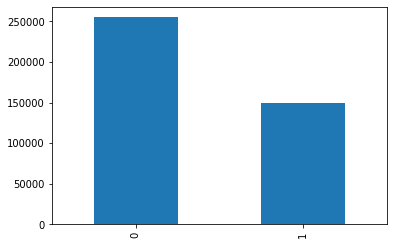

In [ ]:
train_df.is_duplicate.value_counts().plot(kind="bar")

In [ ]:
train_df.is_duplicate.value_counts()/train_df.is_duplicate.value_counts().sum()


0    0.630802
1    0.369198
Name: is_duplicate, dtype: float64

In [ ]:
train_df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
noNa_df = train_df.dropna()
print(noNa_df.isna().sum())
print("length of train_df befor removeing NA {} or after {}.".format(len(train_df),len(noNa_df)))

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64
length of train_df befor removeing NA 404290 or after 404287.


In [ ]:
def preprocess(text):
    # TODO: Replace the next line with your own code.
    doc = nlp(text)
    token_words = []
    token_words = [token.norm_ for token in doc if not token.is_space and not token.is_punct and token.is_ascii ]
    #ascii = [token.text for token in doc if not token.is_ascii ]
    return token_words



In [ ]:
print(noNa_df.question1[253423])
" ".join(preprocess(noNa_df.question1[253423]))
d = noNa_df.question1.apply(lambda x: "".join(preprocess(x)))


In [ ]:
d.loc[~d.isin([''])].to_csv("tt.csv",index=True)


In [ ]:
d.value_counts().to_csv("t.csv")

In [ ]:
columns = ["id","qid1","qid2","question1","question2","is_duplicate"]
index = range(len(noNa_df))
filter_df = pd.DataFrame( columns=columns)
filter_df["qid1"] = pd.to_numeric(noNa_df["qid1"])
filter_df["id"] = pd.to_numeric(noNa_df["id"])
filter_df["qid2"] = pd.to_numeric(noNa_df["qid2"])
filter_df["is_duplicate"] = pd.to_numeric(noNa_df["is_duplicate"])
filter_df["question1"] = noNa_df.question1.apply(lambda x: " ".join(preprocess(x)))
filter_df["question2"] = noNa_df.question2.apply(lambda x: " ".join(preprocess(x)))
filter_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0
3,3,7,8,whi am i mental veri lonely how can i solv it,find the remaind when math]23^{24}[/math is di...,0
4,4,9,10,which one dissolv in water quik sugar salt met...,which fish would surviv in salt water,0


In [ ]:
filter_df.head(12)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0
3,3,7,8,whi am i mental veri lonely how can i solv it,find the remaind when math]23^{24}[/math is di...,0
4,4,9,10,which one dissolv in water quik sugar salt met...,which fish would surviv in salt water,0
5,5,11,12,astrology i am a capricorn sun cap moon and ca...,i am a tripl capricorn sun moon and ascend in ...,1
6,6,13,14,should i buy tiago,what keep childern activ and far from phone an...,0
7,7,15,16,how can i be a good geologist,what should i do to be a great geologist,1
8,8,17,18,when do you use instead of,when do you use instead of and,0
9,9,19,20,motorola company can i hack my charter motorol...,how do i hack motorola dcx3400 for free internet,0


In [ ]:
filter_df.to_csv("filter_train_stem_ASCII.csv")

In [ ]:
from zipfile import ZipFile
file_name = "/content/filter_train.csv.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
train_data = pd.read_csv("/content/filter_train.csv")


In [ ]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,0
0,404289,537932,537933,what is like to have sex with cousin,what is it like to have sex with your cousin,0,1
1,134755,215318,215319,should i start on android or ios for a mobile app,what us startups have started with a mobile ap...,0,1
2,134757,215321,215322,where is delhi india,where is in delhi india,1,1
3,134758,215323,215324,which after market exhaust is best for bajaj a...,i feel useless because despite of being a coll...,0,1
4,134759,215325,215326,would large quantities of dry ice be helpful i...,how can forest fires have a positive effect,0,1


In [ ]:
maxlen_Question1 = np.max(train_data.question1.astype(str).map(len))
maxlen_Question2 = np.max(train_data.question2.astype(str).map(len))
print("max len of question in question 1 {}".format(maxlen_Question1))
print("max len of question in question 2 {}".format(maxlen_Question2))

max len of question in question 1 603
max len of question in question 2 1142


In [ ]:
str1 = "IS Taiwan a Good place to Live"
print(str1)
" ".join(preprocess(str1))

IS Taiwan a Good place to Live


'is taiwan a good place to live'